https://bit.ly/FEML-4-metrics

## Метрики

### Модели разной сложности совершают разные ошибки обучения и ошибки обобщения

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

https://drive.google.com/file/d/1H1d_wOrwtBmlH9KYPmvTVWROF70JuCvF

In [1]:
!wget 'https://drive.google.com/uc?id=1H1d_wOrwtBmlH9KYPmvTVWROF70JuCvF' -O affair_data.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [2]:
import pandas as pd

data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression

Формируем набор признаков и целевую переменную

In [6]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [7]:
Y = data['affairs']

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [9]:
model = LogisticRegression()

Обучаем модель

In [10]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
predictions[:2]

array([[0.37442531, 0.62557469],
       [0.92523085, 0.07476915]])

In [13]:
model.score(X_train, Y_train)

0.7235188509874326

In [14]:
(Y_train == 1).sum(), (Y_train == 0).sum() 

(np.int64(1446), np.int64(3010))

In [15]:
model.score(X_test, Y_test)

0.7319371727748691

### Оценка качества модели

Считаем accuracy последней модели

In [16]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], Y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [17]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [18]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [19]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [20]:
recall = tp / (tp + fn)
recall

0.3723228995057661

In [21]:
from sklearn.metrics import recall_score, precision_score

In [22]:
pred = model.predict(X_test)

In [23]:
recall_score(Y_test, pred)

np.float64(0.3723228995057661)

In [24]:
precision_score(Y_test, pred)

np.float64(0.6330532212885154)

### ROC

In [25]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [26]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [27]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(np.float64(0.0), np.float64(0.0), np.float64(inf))
(np.float64(0.0), np.float64(0.0016474464579901153), np.float64(0.9292102214383593))
(np.float64(0.0), np.float64(0.008237232289950576), np.float64(0.8999850901804585))
(np.float64(0.0007674597083653108), np.float64(0.008237232289950576), np.float64(0.8977272063891569))
(np.float64(0.0007674597083653108), np.float64(0.019769357495881382), np.float64(0.8650832659977858))
(np.float64(0.0030698388334612432), np.float64(0.019769357495881382), np.float64(0.8547102503871123))
(np.float64(0.0030698388334612432), np.float64(0.023064250411861616), np.float64(0.8544823987720077))
(np.float64(0.003837298541826554), np.float64(0.023064250411861616), np.float64(0.8521922726547004))
(np.float64(0.003837298541826554), np.float64(0.03130148270181219), np.float64(0.8338257975410123))
(np.float64(0.004604758250191865), np.float64(0.03130148270181219), np.float64(0.8336034709461732))


In [28]:
import matplotlib.pyplot as plt

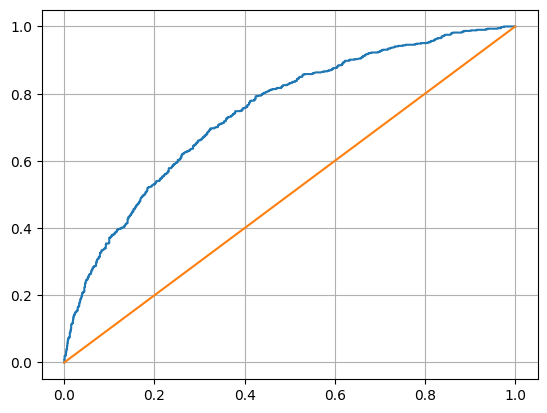

In [29]:
import numpy as np

plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.grid()

**Построим еще одну модель и сравним их между собой**

In [30]:
Xshort = X.loc[ :, ['age', 'children']]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [31]:
model2 = LogisticRegression()

In [32]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split(Xshort, Y, test_size=0.3, random_state=0)

In [33]:
model2.fit(X_train_short, Y_train)

LogisticRegression()

In [34]:
predictions2 = model2.predict_proba(X_test_short)

In [35]:
fpr2, tpr2, thres2 = roc_curve(Y_test, predictions2[:, 1])

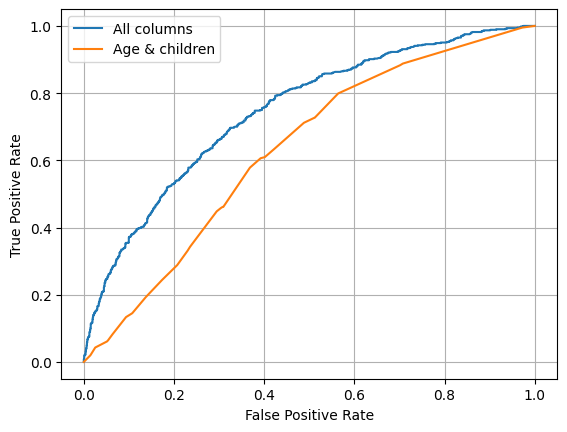

In [36]:
plt.plot(fpr, tpr, label='All columns' )
plt.plot(fpr2, tpr2, label='Age & children')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [37]:
from sklearn.metrics import roc_curve

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(Y_test, predictions[:, 1])

np.float64(0.7451616533130363)

In [40]:
roc_auc_score(Y_test, predictions2[:, 1])

np.float64(0.6311452091928271)

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [41]:
from sklearn.metrics import auc

In [42]:
auc(fpr, tpr)

np.float64(0.7451616533130363)

In [43]:
auc(fpr2, tpr2)

np.float64(0.6311452091928271)

### Используем готовые библиотеки

In [44]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [45]:
pr, re, thres = precision_recall_curve(Y_test, predictions[:, 1])

In [46]:
# посмотрим что получилось
for line in zip(pr[:10], re[:10], thres[:10]):
    print(line)

(np.float64(0.31780104712041884), np.float64(1.0), np.float64(0.04620460572591421))
(np.float64(0.31796752226296493), np.float64(1.0), np.float64(0.0484353713525096))
(np.float64(0.31813417190775684), np.float64(1.0), np.float64(0.05169384506576067))
(np.float64(0.3183009963293131), np.float64(1.0), np.float64(0.053898664764346293))
(np.float64(0.3184679958027282), np.float64(1.0), np.float64(0.05401252760544732))
(np.float64(0.3186351706036745), np.float64(1.0), np.float64(0.05680733155618443))
(np.float64(0.31880252100840334), np.float64(1.0), np.float64(0.06067784767296862))
(np.float64(0.31897004729374673), np.float64(1.0), np.float64(0.06154840857608826))
(np.float64(0.31913774973711884), np.float64(1.0), np.float64(0.06251874515302346))
(np.float64(0.3194736842105263), np.float64(1.0), np.float64(0.06364920882066627))


(0.0, 1.0)

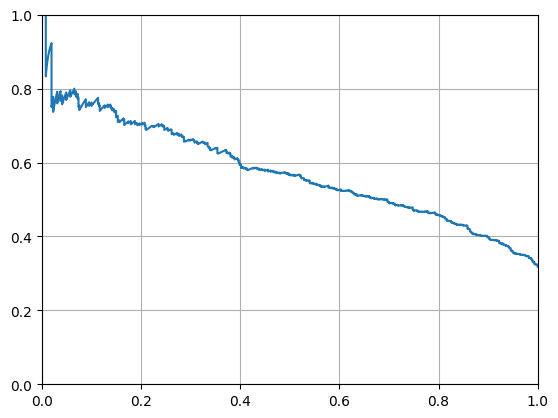

In [47]:
plt.plot(re, pr)
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)

### Пример влияния L1 и L2-регуляризации

In [48]:
model1 = LogisticRegression(penalty='l1',
                            C=0.01,
                            solver='liblinear').fit(X_train, Y_train)
predictions = model1.predict_proba(X_test)

In [49]:
model2 = LogisticRegression(penalty='l2',
                            C=0.01,
                            solver='liblinear').fit(X_train, Y_train)
predictions2 = model2.predict_proba(X_test)

In [50]:
model3 = LogisticRegression(penalty='l2',
                            C=1,
                            solver='liblinear').fit(X_train, Y_train)
predictions3 = model3.predict_proba(X_test)

In [51]:
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])
fpr2, tpr2, thres2 = roc_curve(Y_test, predictions2[:, 1])
fpr3, tpr3, thres3 = roc_curve(Y_test, predictions3[:, 1])

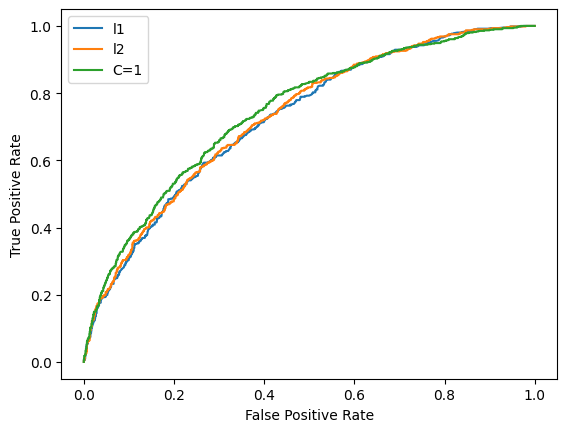

In [52]:
plt.plot(fpr, tpr, label='l1')
plt.plot(fpr2, tpr2, label='l2')
plt.plot(fpr3, tpr3, label='C=1')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.show()

In [53]:
auc1 = roc_auc_score(Y_test, predictions[:, 1])
auc2 = roc_auc_score(Y_test, predictions2[:, 1])
auc3 = roc_auc_score(Y_test, predictions3[:, 1])
auc1, auc2, auc3

(np.float64(0.7252595391954443),
 np.float64(0.7298187808896212),
 np.float64(0.7447431538674533))

## Еще пример регуляризации

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def f(x):
  return x - 0.15 * x**2 + 0.01 * x**3 - 0.001 * x**4 + 0.0001 * x**5

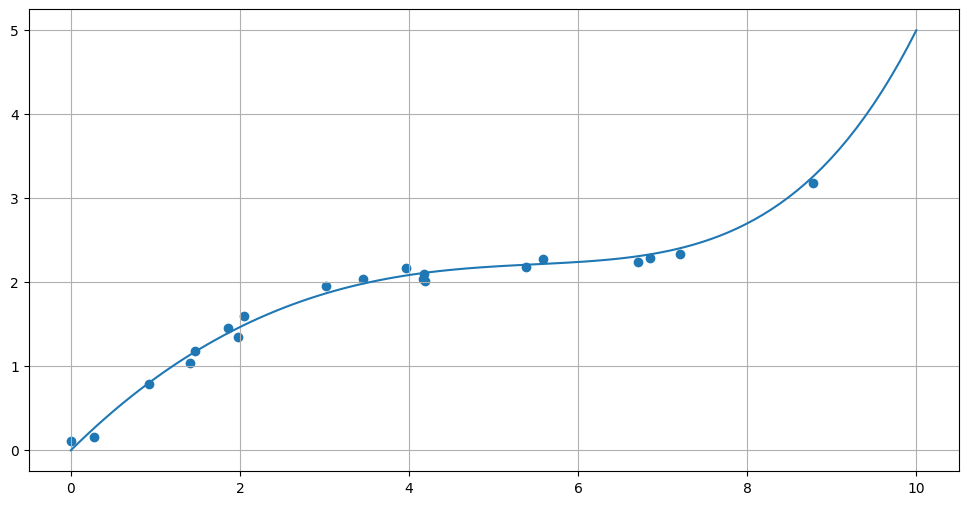

In [56]:
true_x = np.linspace(0,10,100)
true_y = f(true_x)
true_x = true_x.reshape(-1,1)


np.random.seed(1)
x = np.sort(np.random.uniform(0, 10, 20))
y = f(x) + 0.1*np.random.randn(20)
x = x.reshape(-1,1)


plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.plot(true_x, true_y)
plt.grid()

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(PolynomialFeatures(11, include_bias=False),
                     StandardScaler())

pipe.fit(x_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=11, include_bias=False)),
                ('standardscaler', StandardScaler())])

In [59]:
X_train = pipe.transform(x_train)
X_test = pipe.transform(x_test)

In [60]:
X_train.shape

(17, 11)

In [61]:
lg_r, lg_l, pred_r, pred_l = [], [], [], []
list_r = list(1.5**np.linspace(-10, 2, 10))
list_l = list(2**np.linspace(-10, 2, 10))

In [62]:
list_r

[np.float64(0.017341529915832612),
 np.float64(0.02977664442347742),
 np.float64(0.051128623450501245),
 np.float64(0.0877914951989026),
 np.float64(0.15074426239385438),
 np.float64(0.25883865621816254),
 np.float64(0.4444444444444444),
 np.float64(0.7631428283688876),
 np.float64(1.310370697104448),
 np.float64(2.25)]

In [63]:
for i in range(len(list_r)):
  m_r = Ridge(alpha=list_r[i]).fit(X_train, y_train)
  m_l = Lasso(alpha=list_l[i]).fit(X_train, y_train)
  lg_r.append(m_r)
  pred_r.append(m_r.coef_)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

lg_r.append(LinearRegression().fit(X_train, y_train))
lg_l.append(LinearRegression().fit(X_train, y_train))

In [64]:
lg_r

[Ridge(alpha=np.float64(0.017341529915832612)),
 Ridge(alpha=np.float64(0.02977664442347742)),
 Ridge(alpha=np.float64(0.051128623450501245)),
 Ridge(alpha=np.float64(0.0877914951989026)),
 Ridge(alpha=np.float64(0.15074426239385438)),
 Ridge(alpha=np.float64(0.25883865621816254)),
 Ridge(alpha=np.float64(0.4444444444444444)),
 Ridge(alpha=np.float64(0.7631428283688876)),
 Ridge(alpha=np.float64(1.310370697104448)),
 Ridge(alpha=np.float64(2.25)),
 LinearRegression()]

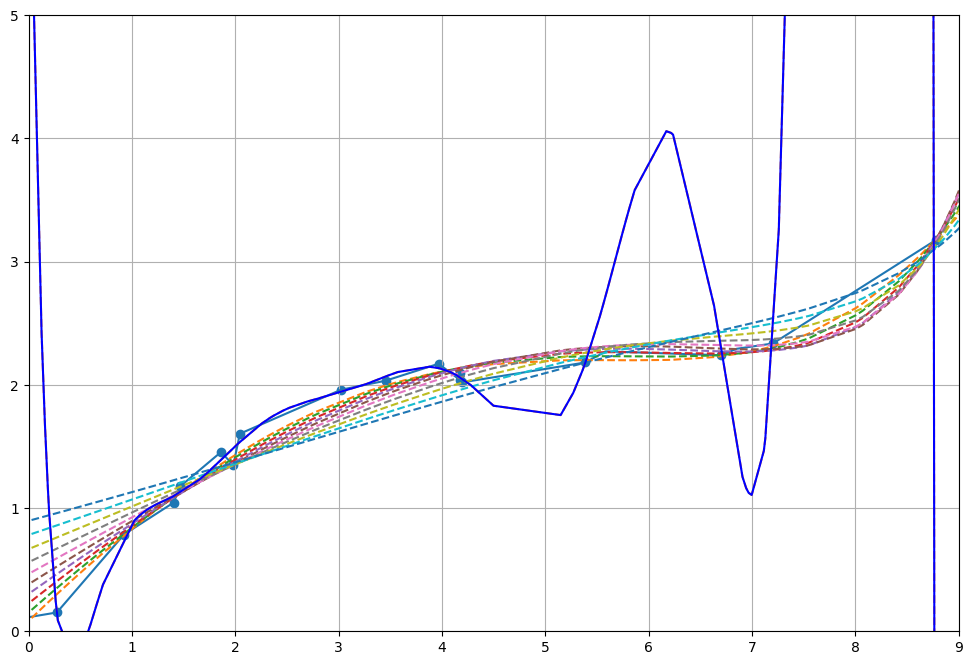

In [65]:
plt.figure(figsize=[12,8])
plt.plot(x, y)
plt.scatter(x_train, y_train)

x_t = np.sort(np.random.uniform(0, 10, 100)).reshape(-1, 1)
X = pipe.transform(x_t)
for i, m in enumerate(lg_r):
    plt.plot(x_t, m.predict(X), '--')

plt.plot(x_t, lg_r[-1].predict(X), 'b-')
plt.xlim(0,9)
plt.ylim(0,5)
plt.grid()

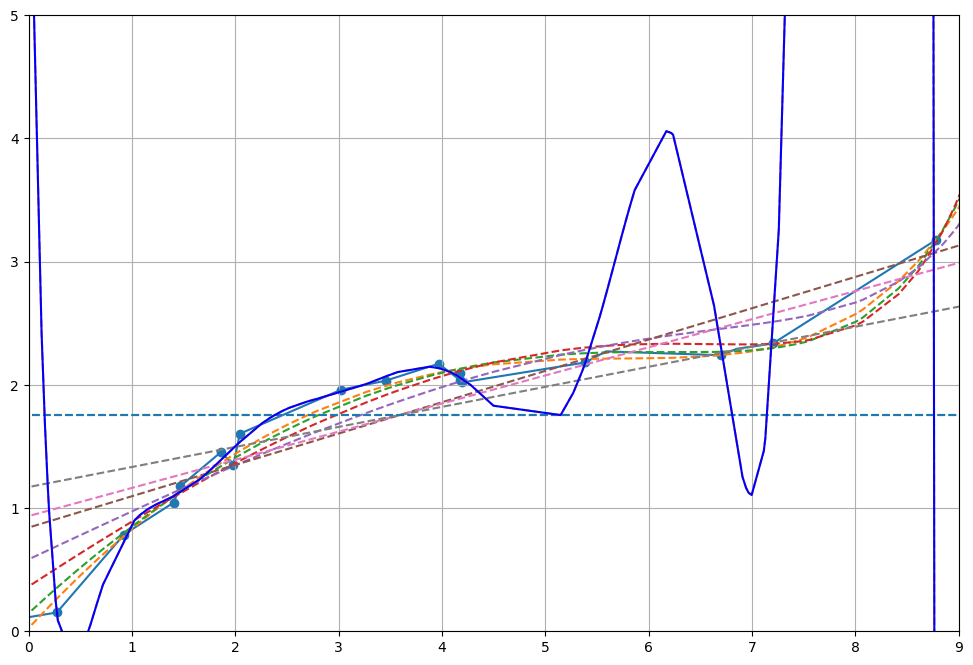

In [66]:
plt.figure(figsize=[12,8])
plt.plot(x, y)
plt.scatter(x_train, y_train)

for i, m in enumerate(lg_l):
    plt.plot(x_t, m.predict(X), '--')

plt.plot(x_t, lg_l[-1].predict(X), 'b-')
plt.xlim(0,9)
plt.ylim(0,5)
plt.grid()

In [67]:
np.vstack(pred_r).T

array([[ 1.86421546e+00,  1.69983330e+00,  1.52775393e+00,
         1.36314562e+00,  1.21271224e+00,  1.07246916e+00,
         9.33936806e-01,  7.92690554e-01,  6.52722514e-01,
         5.23189683e-01],
       [-1.23642879e+00, -9.59871759e-01, -6.87463552e-01,
        -4.47930560e-01, -2.58599354e-01, -1.20151853e-01,
        -2.29582409e-02,  4.42584158e-02,  8.95000897e-02,
         1.16924344e-01],
       [-8.18175129e-01, -7.29555697e-01, -6.26884729e-01,
        -5.24601658e-01, -4.30402249e-01, -3.43848215e-01,
        -2.60780913e-01, -1.79243534e-01, -1.02602536e-01,
        -3.77132866e-02],
       [-9.88391482e-02, -1.72502349e-01, -2.32838351e-01,
        -2.74215844e-01, -2.91701959e-01, -2.83115158e-01,
        -2.49715613e-01, -1.97094313e-01, -1.35357073e-01,
        -7.63213939e-02],
       [ 2.99662715e-01,  1.70956668e-01,  4.52437651e-02,
        -5.97214727e-02, -1.31634665e-01, -1.66907397e-01,
        -1.68897363e-01, -1.45595846e-01, -1.08019663e-01,
        -6.

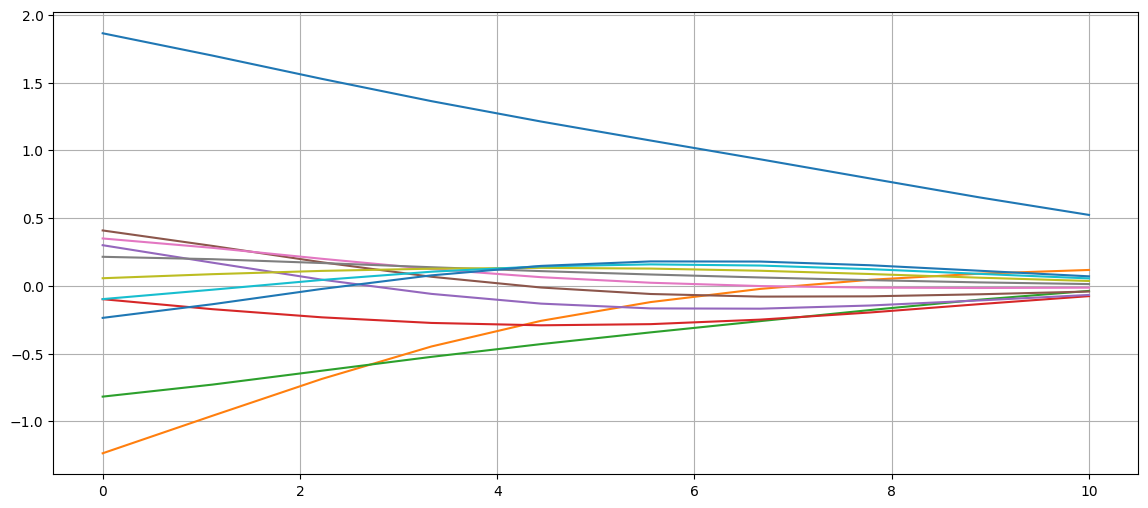

In [68]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_l,i)
plt.grid()


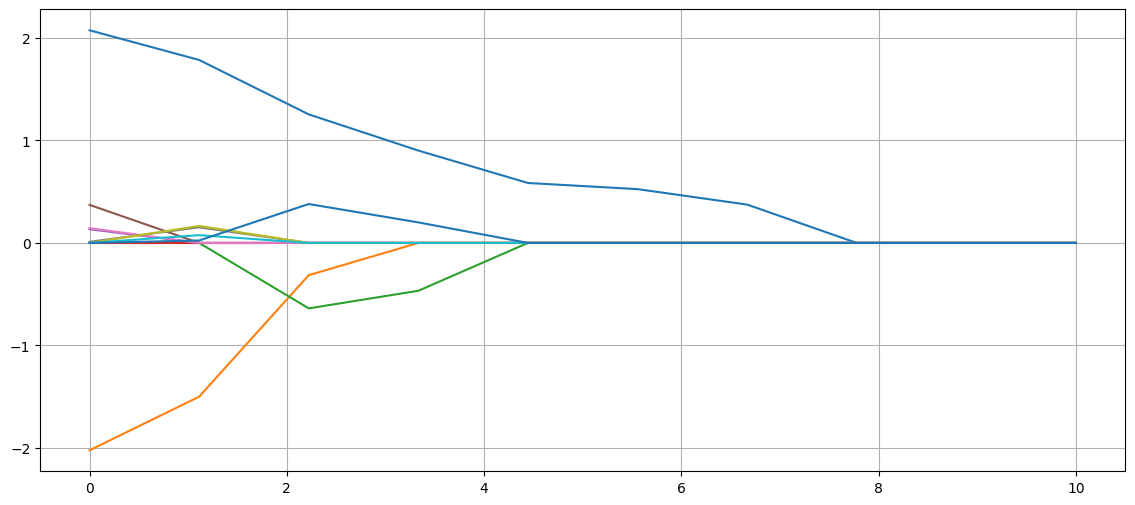

In [69]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,i)
plt.grid()

# **Дополнительные материалы**
1. Недообучение и переобучение - https://youtu.be/m7P7bnLxIc4
3. Метрики для классификации (Accuracy, Precision, Recall, F-score, Pr-AUC, Roc-AUC) - https://youtube.com/playlist?list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje
10. Метрики для регрессии - https://youtu.be/vh2smjQyhp8
4. Регуляризация в линейной модели - https://www.youtube.com/watch?v=L_o8v5A23XA
5. Регуляризация - https://neerc.ifmo.ru/wiki/index.php?title=%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F
6. Регуляризация - https://proproprogs.ru/ml/ml-l2-regulyarizator-matematicheskoe-obosnovanie-i-primer-raboty
7. Регуляризация - https://www.youtube.com/watch?v=RvcP3a727Fg
8. Регуляризация - https://youtu.be/Q81RR3yKn30